# Bulk Data Scientist Task - Customer Churn Prediction

#### Notebook Contents

>1. Imports<br>
>2. Dataset Examination<br>
>3. Data Cleaning<br>
>4. Exploratory Data Analysis<br>
>5. Feature Engineering<br>
>6. Model Building<br>
>7. Model Evaluation<br>

______

______

# 1. Imports

In [56]:
# General
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="magma")
%matplotlib inline

# Feature engineering
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# Cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Images
from IPython import display

______

______

# 2. Dataset Examination

In [57]:
df = pd.read_excel("dataset.xlsx", sheet_name="E Comm")

In [58]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [60]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [61]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


- Maximum values show that there are no unexpected outliers
- Minimum values show that zeros are recorded as 0 and not NaN
- Mean and quartile values are not unreasonable or surprising

In [62]:
# Unique values for categorical columns
categorical = [column for column in df.columns if df[column].dtype == "object"]

for column in categorical:
    print(column)
    print(df[column].unique())
    print("\n")

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']


PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']


Gender
['Female' 'Male']


PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']


MaritalStatus
['Single' 'Divorced' 'Married']




In [63]:
# Identifying binary columns
def is_binary(column):
    return sorted(df[column].unique()) == [0, 1]

binary = [column for column in df.columns if is_binary(column)]

In [64]:
binary

['Churn', 'Complain']

______

______

# 3. Data Cleaning

Due to the small dataset size, instances with missing values will not be dropped. For simplicity of this task, mean (for continuous) and median (for discrete) values will replace NaN values, although in reality, more accurate values can be imputed.

In [65]:
# Filling continuous missing values with mean
continuous = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear"]

for column in continuous:
    df[column].fillna(value=(df[column].mean()), inplace=True)

# Filling discrete missing values with median
discrete = ["CouponUsed", "OrderCount", "DaySinceLastOrder"]

for column in discrete:
    df[column].fillna(value=(df[column].median()), inplace=True)

In [66]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

CustomerID column can be dropped as they are unique values and will not contribute to model learning.

In [67]:
print(df["CustomerID"].nunique())
print(len(df))

5630
5630


In [68]:
# Dropping Customer ID
df.drop(columns="CustomerID", inplace=True)

In [69]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

______

______

# 4. Exploratory Data Analysis

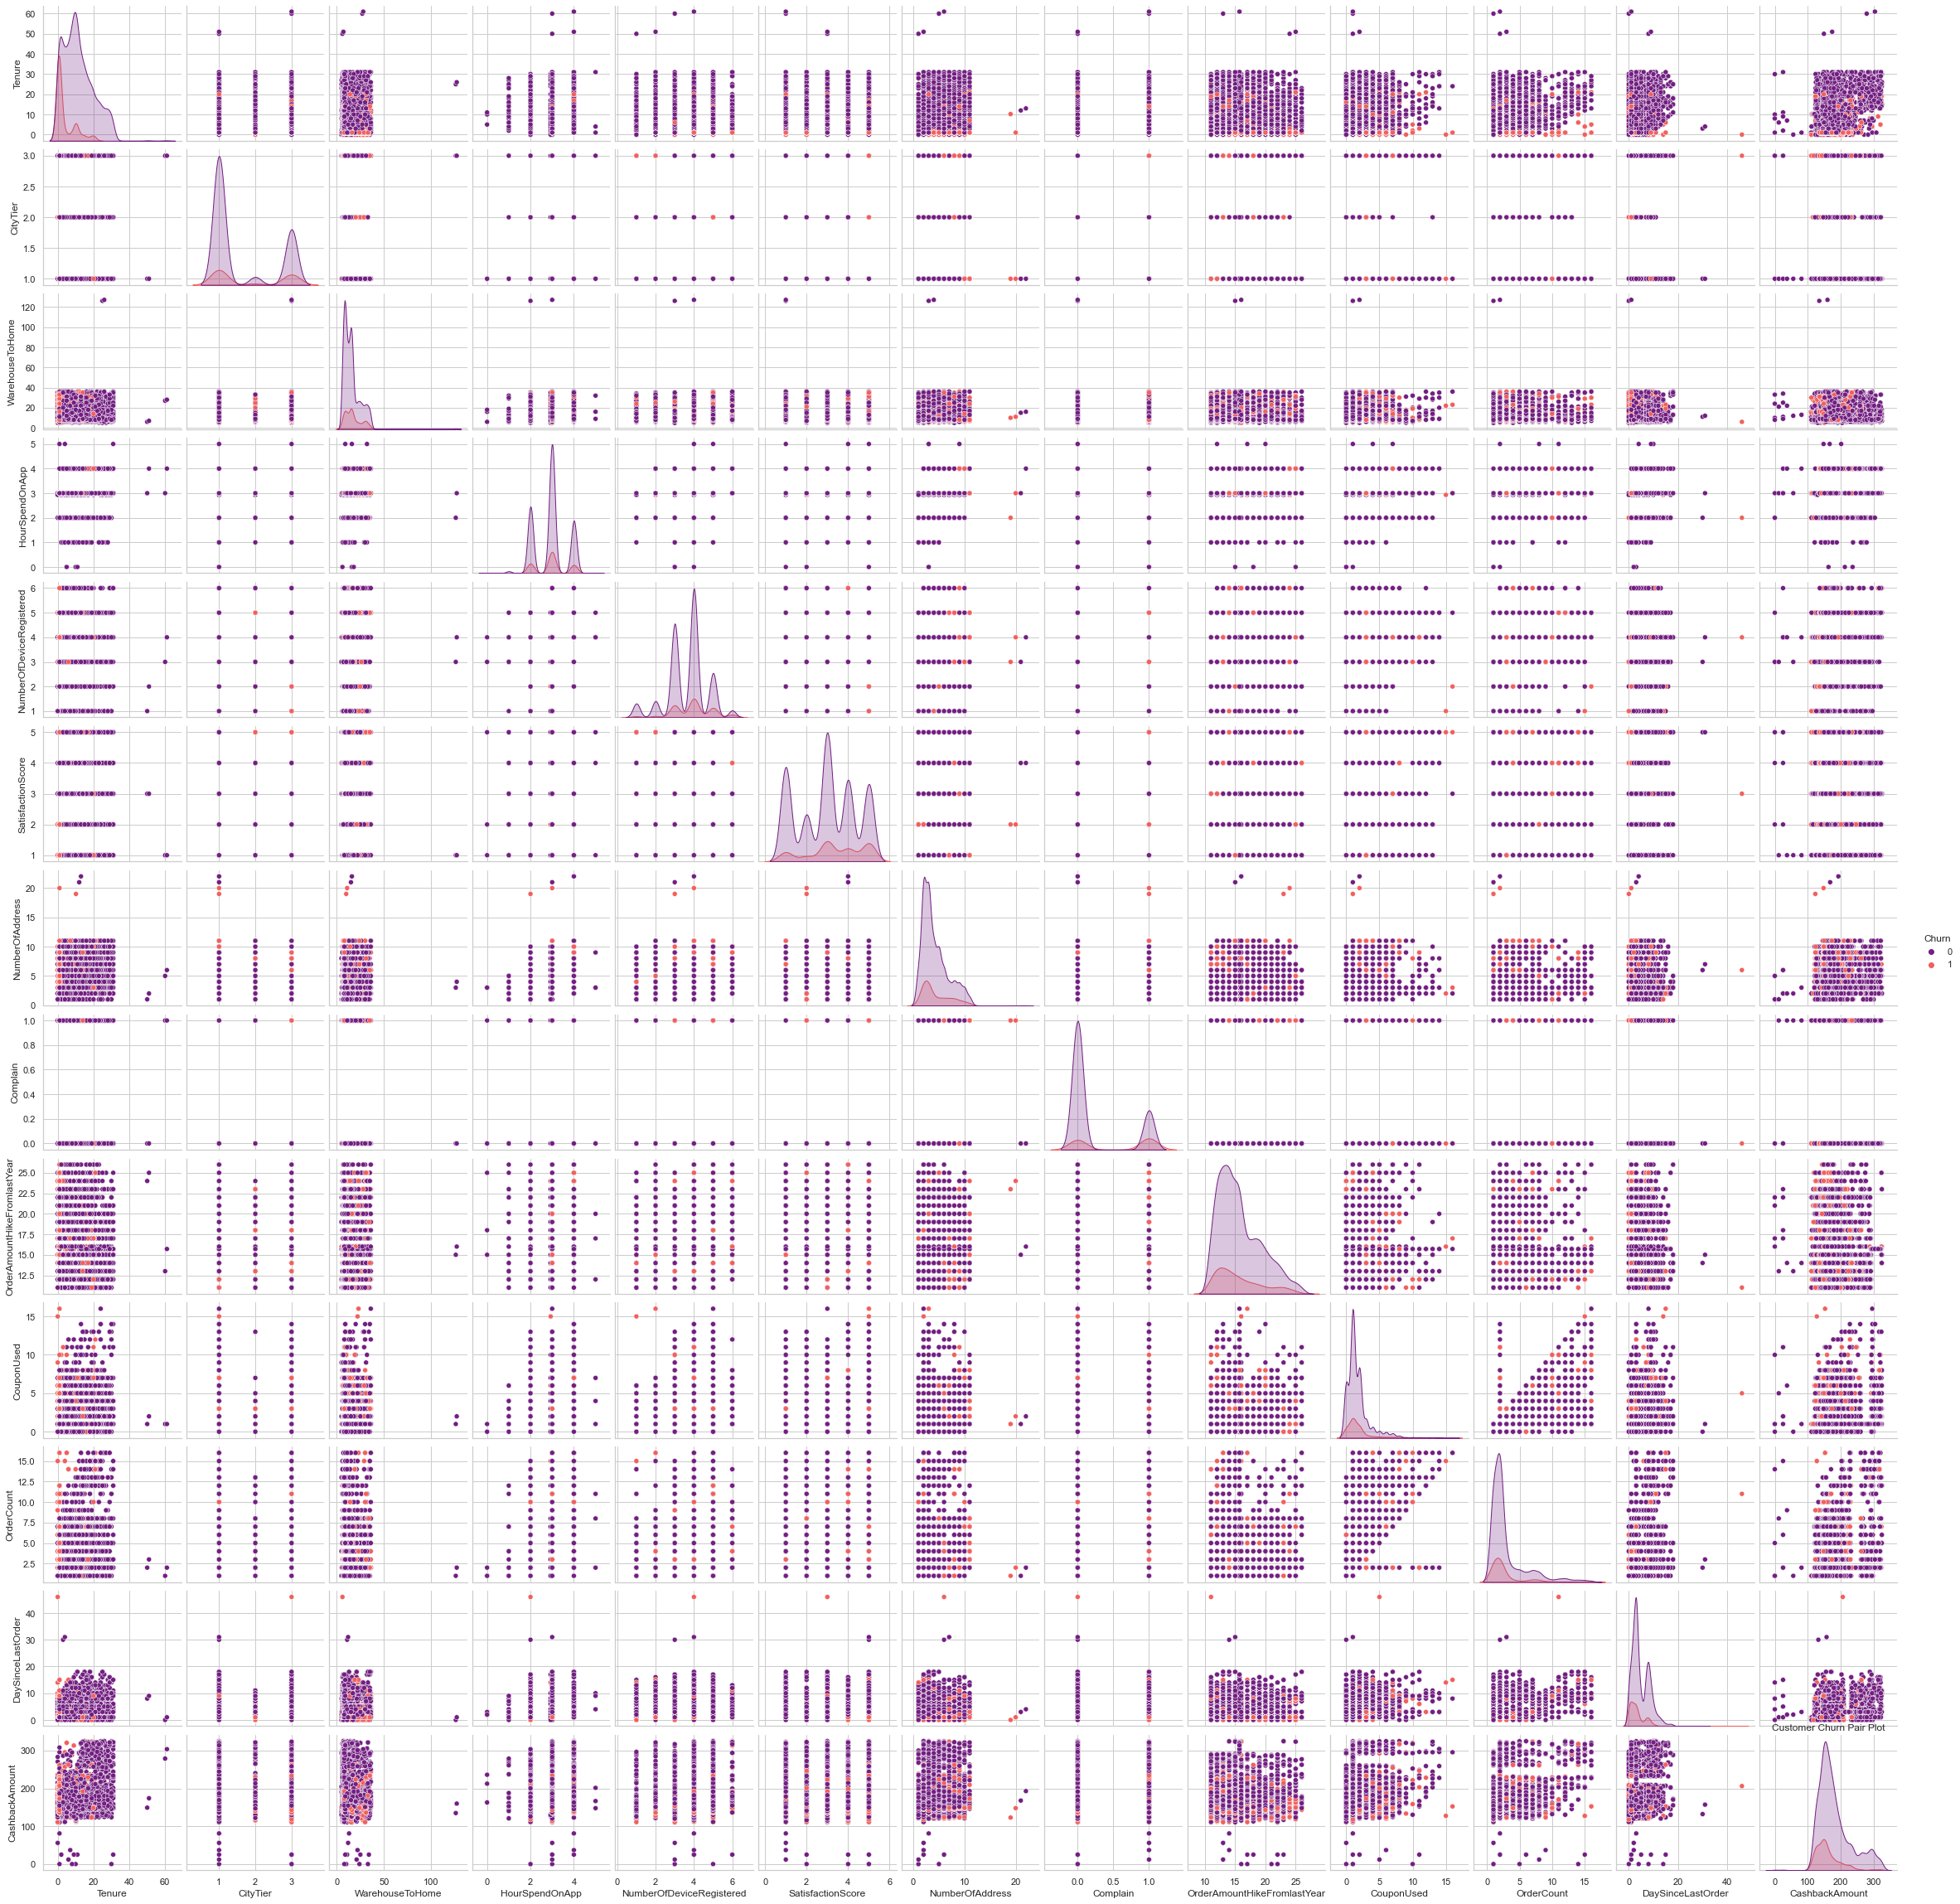

In [70]:
# Visualising pairwise relationships between features
sns.pairplot(df, hue="Churn", palette="magma")
plt.title(f"Customer Churn Pair Plot")
plt.show()

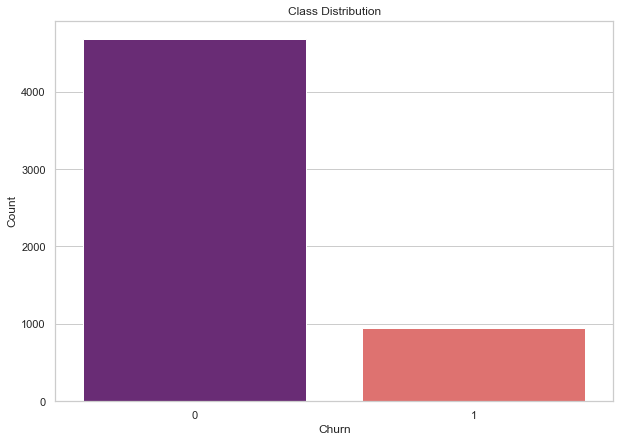

0    0.831616
1    0.168384
Name: Churn, dtype: float64


In [71]:
# Visualising distribution of label
plt.figure(figsize=(10, 7))
sns.countplot(x="Churn", data=df, palette="magma")
plt.title(f"Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()
print(df["Churn"].value_counts(normalize=True))

There is a class imbalance in the dataset which is expected. It is a naturally occuring imbalance as it would be unusual for the number of customers churned to be the same as the number of customers retained. This imbalance could affect model performance, especially for a dataset of this size. Although the imbalance will not be dealt with for this task, techniques to consider for future work include:
- Oversampling the minority class
- Collecting a lot more data and undersampling the majority class
- Synthetic Minority Oversampling Technique (SMOTE) - Picking a random point from the minority class and computing the k-nearest neighbours for this point, then adding synthetic points between the chosen point and its neighbours

These techniques for dealing with class imbalance can be implemented with the [imbalanced-learn](https://imbalanced-learn.org/stable/index.html) library.

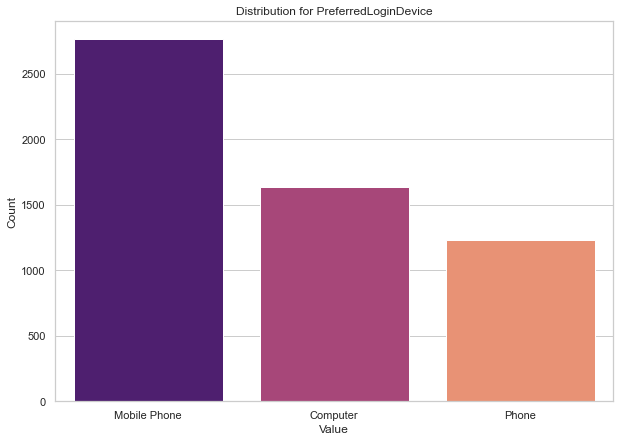

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64




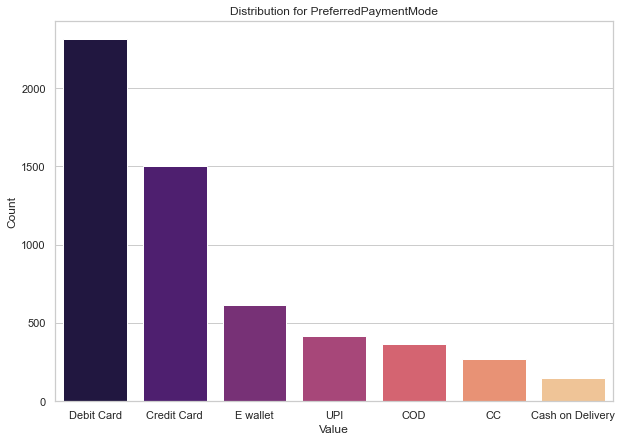

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64




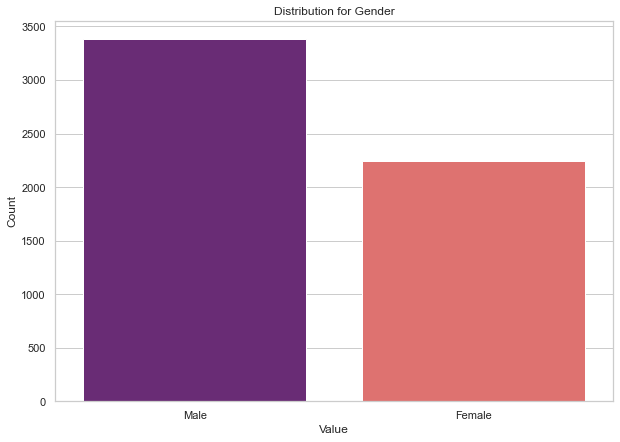

Male      3384
Female    2246
Name: Gender, dtype: int64




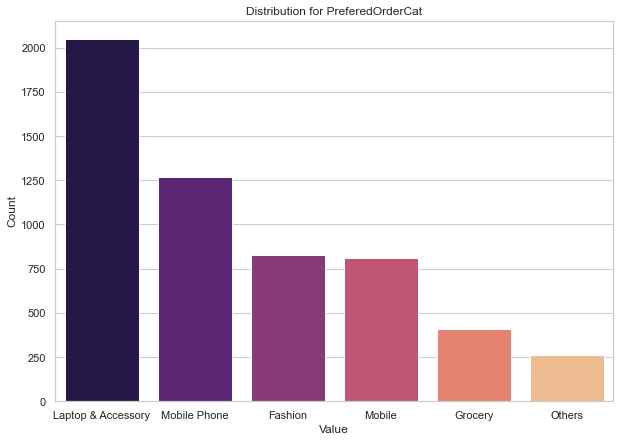

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64




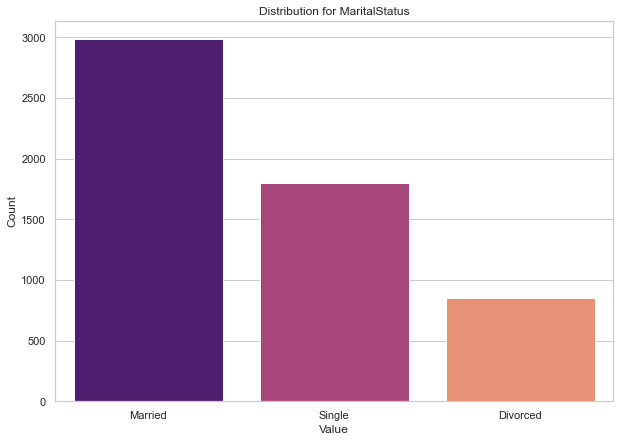

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




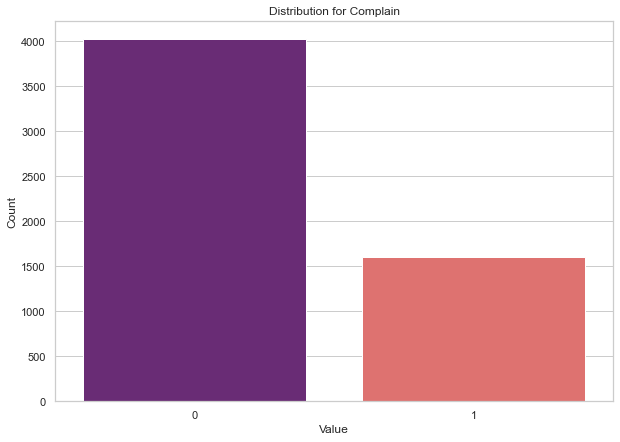

0    4026
1    1604
Name: Complain, dtype: int64




In [72]:
# Visualising distribution of categorical columns (including binary)
categorical_dist = categorical + ["Complain"]

def plot_bar(column):
    plt.figure(figsize=(10, 7))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts(), data=df, palette="magma")
    plt.title(f"Distribution for {column}")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.show()
    print(df[column].value_counts())
    print("\n")

for column in categorical_dist:
    plot_bar(column)

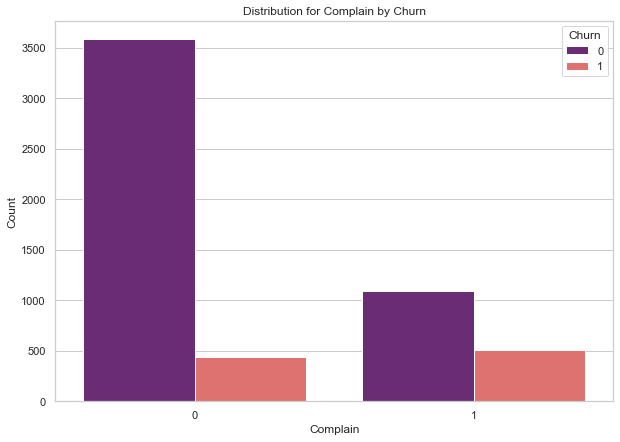

In [73]:
# Visualising Complain by Churn
plt.figure(figsize=(10, 7))
sns.countplot(x="Complain", hue="Churn", data=df, palette="magma")
plt.title(f"Distribution for Complain by Churn")
plt.xlabel("Complain")
plt.ylabel("Count")
plt.show()

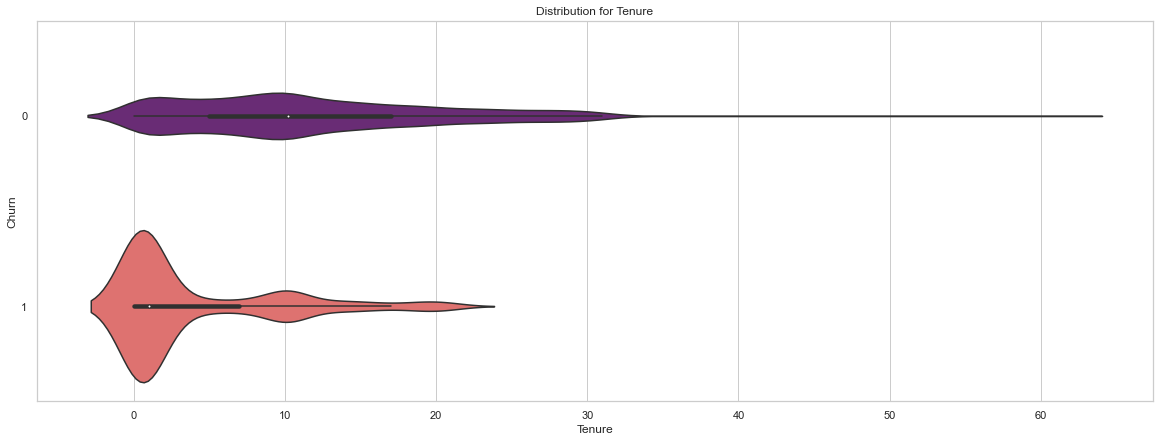

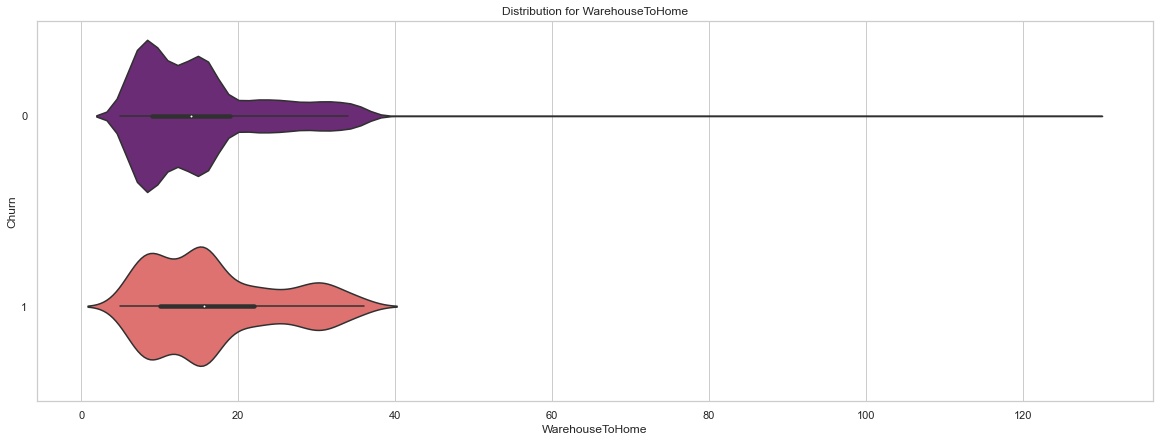

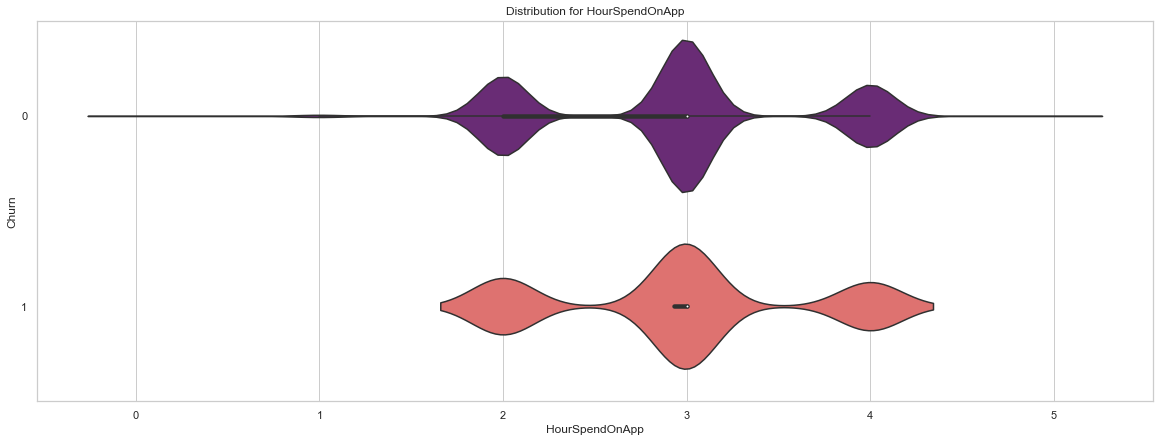

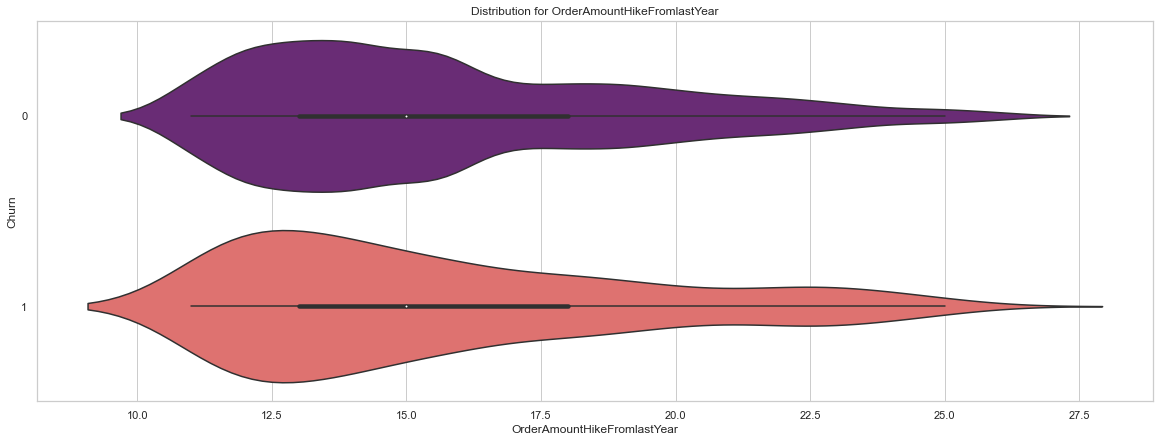

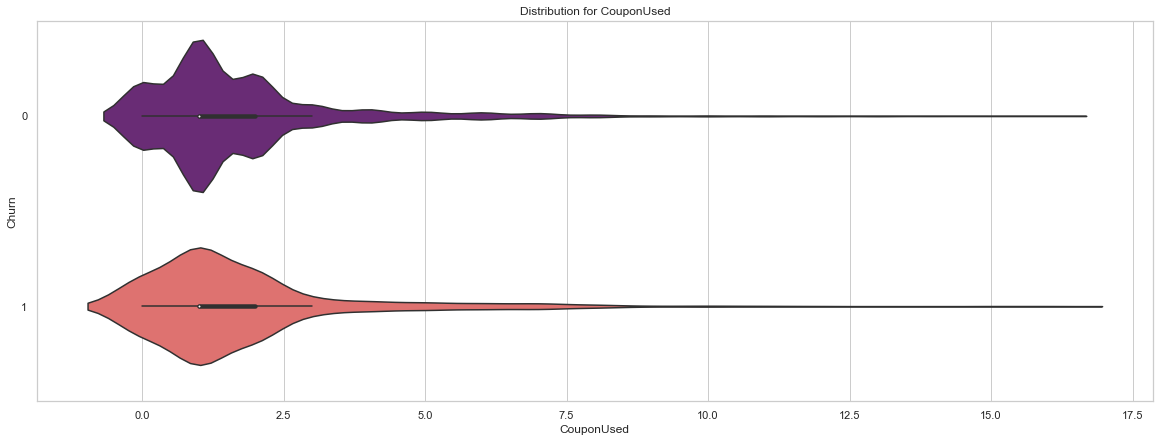

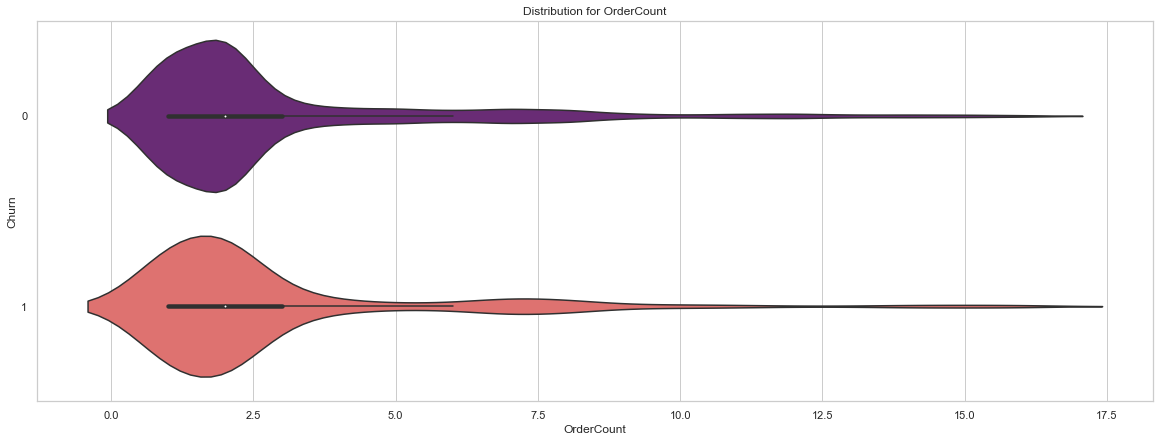

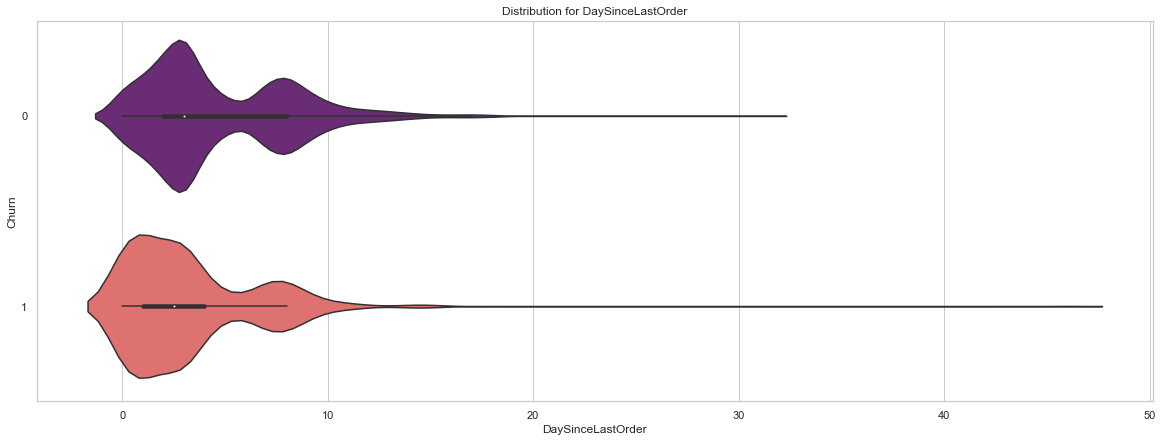

In [74]:
# Visualising distribution of numerical columns per class
numerical = continuous + discrete

def plot_violin(column):
    plt.figure(figsize=(20, 7))
    sns.violinplot(x=column, y="Churn", data=df, orient="h", palette="magma")
    plt.title(f"Distribution for {column}")
    plt.xlabel(column)
    plt.ylabel("Churn")
    plt.show()
    print("\n")

for column in numerical:
    plot_violin(column)

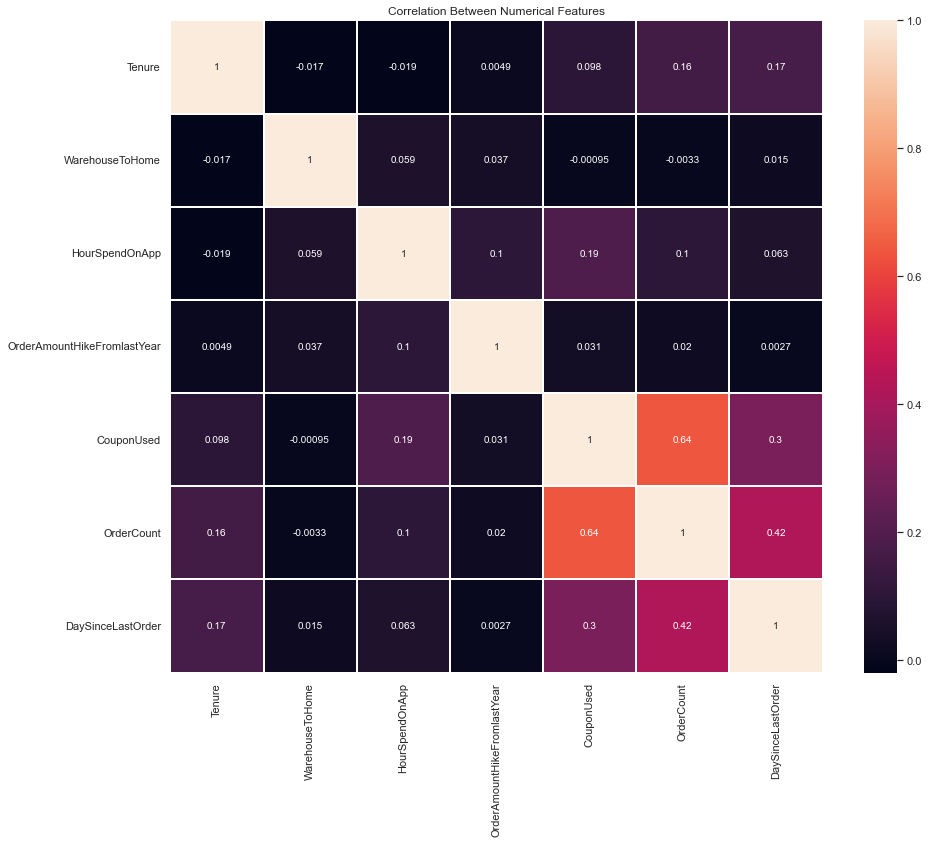

In [75]:
# Visualising Pearson correlation between numerical features
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical].corr(), linewidths=0.05, square=True, annot=True)
plt.title("Correlation Between Numerical Features")
plt.show()

In general, an absolute correlation coefficient of >0.7 between two or more features indicates the presence of multicollinearity which would affect the ability to interpret feature importance. The heat map shows that numerical features are mostly not strongly correlated.

______

______

# 5. Feature Engineering

Ideally, the dataset would be split into a training(70%), validation(15%) and test(15%) sets with the validation set used to choose the learning algorithm and tune hyperparameters and test set used to assess the final model before production. However, because the dataset is too small for two holdout sets, the data will be split into training(80%) and test(20%) sets. Instead of a validation set, cross validation will be used to evaluate model performance.

In [76]:
# Splitting into training and test set
X = df.drop(columns='Churn')
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 18)
(1126, 18)
(4504,)
(1126,)


Feature scaling of numerical features will allow the model to learn faster. For this task, normalisation will be used since the dataset does not contain exteme outliers that would benefit from standardisation (which also works better with normally distributed features). In practice, it would be good to test both scaling methods to see which produces better results.

Categorical features will also need to be one hot encoded into multiple binary features to be interpreted by the model.

In [78]:
scaler = MinMaxScaler()
encoder = OneHotEncoder()

ct = make_column_transformer(
    (scaler, numerical),     # Normalising numerical
    (encoder, categorical),  # Encoding categorical
    remainder="passthrough") # Leaving the remaining

X_train = ct.fit_transform(X_train) # Fit to training set only and transform
X_test = ct.transform(X_test)       # Transform test set

The original dataset contained 18 features. 5 categorical features were encoded into 21 binary features so the expected number of features now is 34.

In [79]:
print(X_train.shape)
print(X_test.shape)

(4504, 34)
(1126, 34)


______

______

# 6. Model Building

As a baseline, the following binary classification algorithms will be tested:

- Logistic Regression
- Support Vector Machine
- k-Nearest Neighbour
- Decision Tree
- Random Forest
- XGBoost
- LightGBM

The performance of each algorithm will be evaluated with a five-fold cross-validation accuracy score (the mean score of the five folds will be taken).

In [80]:
# List of models
classifiers = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier()    
]

# 5 fold cross validation
cv = KFold(5, shuffle=True, random_state=42)

# List of cross validation scores
baseline_scores = [cross_val_score(classifier, X_train, y_train, cv=cv).mean() for classifier in classifiers]

# List of model names
names = [classifier.__class__.__name__ for classifier in classifiers]

# Table of results
results = pd.DataFrame({'Model': names, 'Baseline Score': baseline_scores})
results.style.highlight_max(subset='Baseline Score', color='lightgreen')

[19:12:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:15] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:16] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

,Model,Baseline Score
0,LogisticRegression,0.865897
1,SVC,0.831703
2,KNeighborsClassifier,0.843247
3,DecisionTreeClassifier,0.937831
4,RandomForestClassifier,0.952045
5,XGBClassifier,0.963589
6,LGBMClassifier,0.963368


Although a grid search of an exhaustive list of values for each hyperparameter of each model would be able to produce the best model, limitations with computational power and time constraints do not allow for that in this task. Therefore, only the XGBoost algorithm will be used for this task and only the most important parameters with a reasonable range of values will be tuned.

In [81]:
xgb_model = XGBClassifier()

# Dictionary of hyperparameters and values to test
xgb_params = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(2, 11, 2),
    'learning_rate': [0.001, 0.01, 0.1, 0.3]
}

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=cv, n_jobs=-1)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

[19:37:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800}
0.9691392280182514


______

______

# 7. Model Evaluation

#### Metrics

In [82]:
# Tuned model with hyperparameters giving best score
model_tuned = xgb_grid.best_estimator_

Performance of models will be evaluated with the following metrics:
- __Accuracy:__<br>Ability of a classifier make correct predictions.<br>
- __Precision:__<br>Ability of a classifier not to label a nagative sample as positive.<br>
- __Recall:__<br>Ability of a classifier to find all positive samples per class.<br>
- __F1 Score:__<br>Harmonic mean of precision and recall.<br>

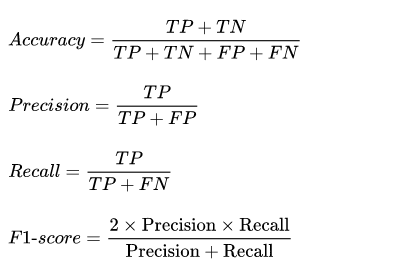

In [83]:
display.Image("https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png")

In [84]:
def calculate_metrics(model):
    
    y_pred = model.predict(X_test)
    model_name = type(model).__name__
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, normalize='true', labels=model.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    
    disp.plot(cmap="magma")
    plt.grid(False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    
    # Scores
    accuracy = np.round(accuracy_score(y_test, y_pred), decimals=3)
    precision = np.round(precision_score(y_test, y_pred), decimals=3)
    recall = np.round(recall_score(y_test, y_pred), decimals=3)
    f1 = np.round(f1_score(y_test, y_pred), decimals=3)
    
    scores = pd.DataFrame({
        "Model": [model_name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1 Score": [f1]
    })
    
    return scores

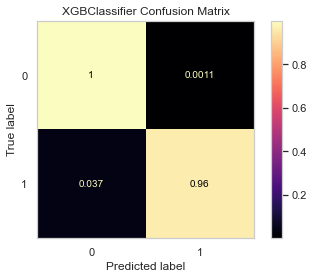

,Model,Accuracy,Precision,Recall,F1 Score
0,XGBClassifier,0.993,0.995,0.963,0.979


In [85]:
calculate_metrics(model_tuned)

#### Feature Importance

Feature importance is used to interpret the significance of each feature used in the mode. The importance type used in this task is gain, which implies the relative contribution of the corresponding feature for each tree in the model. A higher value indicates higher importance for generating a prediction.

In [86]:
# Feature list including one hot encoded binary features
features = [
    "Tenure",
    "PreferredLoginDevice - Mobile Phone",
    "PreferredLoginDevice - Phone",
    "PreferredLoginDevice - Computer",
    "CityTier",
    "WarehouseToHome",
    "PreferredPaymentMode - Debit Card",
    "PreferredPaymentMode - UPI",
    "PreferredPaymentMode - CC",
    "PreferredPaymentMode - Cash on Delivery",
    "PreferredPaymentMode - E wallet",
    "PreferredPaymentMode - COD",
    "PreferredPaymentMode - Credit Card",
    "Gender - Female",
    "Gender - Male",
    "HourSpendOnApp",
    "NumberOfDeviceRegistered",
    "PreferedOrderCat - Laptop & Accessory",
    "PreferedOrderCat - Mobile",
    "PreferedOrderCat - Mobile Phone",
    "PreferedOrderCat - Others",
    "PreferedOrderCat - Fashion",
    "PreferedOrderCat - Grocery",
    "SatisfactionScore",
    "MaritalStatus - Single",
    "MaritalStatus - Divorced",
    "MaritalStatus - Married",
    "NumberOfAddress",
    "Complain",
    "OrderAmountHikeFromlastYear",
    "CouponUsed",
    "OrderCount",
    "DaySinceLastOrder",
    "CashbackAmount"
]

In [87]:
importances = model_tuned.feature_importances_

importance_df = pd.DataFrame({
        "Feature": features,
        "Importance": importances
    })

importance_df.sort_values("Importance", ascending=False, inplace=True)

importance_df

,Feature,Importance
0,Tenure,0.112614
32,DaySinceLastOrder,0.074833
15,HourSpendOnApp,0.043990
20,PreferedOrderCat - Others,0.043267
19,PreferedOrderCat - Mobile Phone,0.041899
7,PreferredPaymentMode - UPI,0.040748
24,MaritalStatus - Single,0.040589
21,PreferedOrderCat - Fashion,0.038429
31,OrderCount,0.036357
27,NumberOfAddress,0.035496


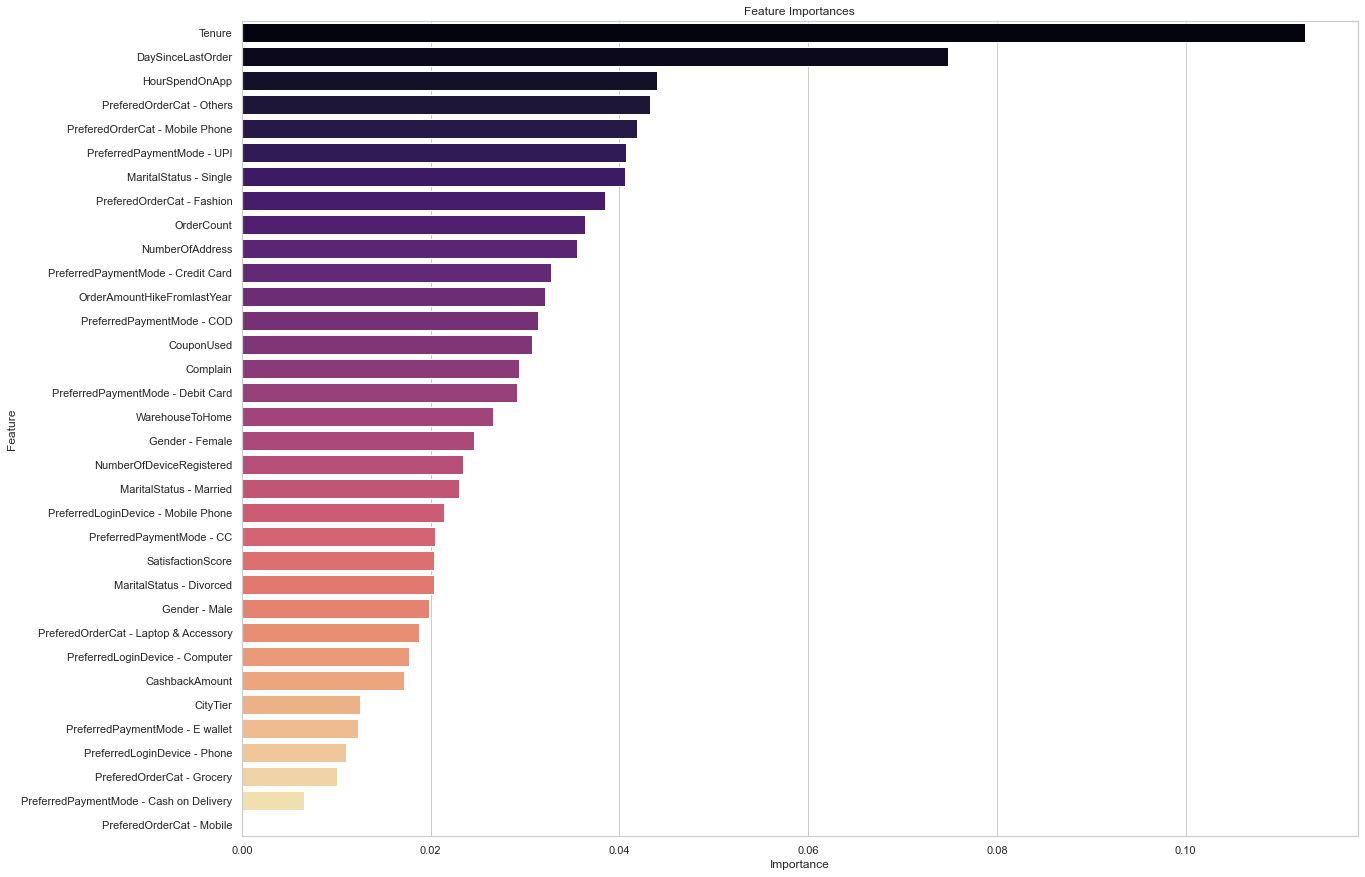

In [88]:
plt.figure(figsize=(20, 15))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="magma")
plt.title(f"Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

______

______